### Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/combinedDS.csv')
df

,Pregnancies,PlasmaGlucose/Glucose,DiastolicBloodPressure/BloodPressure,TricepsThickness/SkinThickness,SerumInsulin/Insulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...
15763,10,101,76,48,180,32.900000,0.171000,63,0
15764,2,122,70,27,0,36.800000,0.340000,27,0
15765,5,121,72,23,112,26.200000,0.245000,30,0
15766,1,126,60,0,0,30.100000,0.349000,47,1


### Checking for null values 

In [ ]:
df.isnull().sum()

Pregnancies                             0
PlasmaGlucose/Glucose                   0
DiastolicBloodPressure/BloodPressure    0
TricepsThickness/SkinThickness          0
SerumInsulin/Insulin                    0
BMI                                     0
DiabetesPedigree                        0
Age                                     0
Diabetic                                0
dtype: int64

### Some data visualization

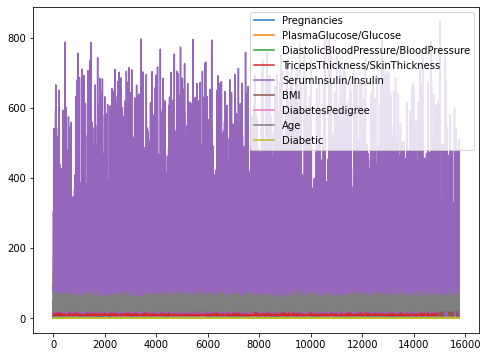

In [ ]:
df.plot.line(figsize=(8,6))
plt.show()

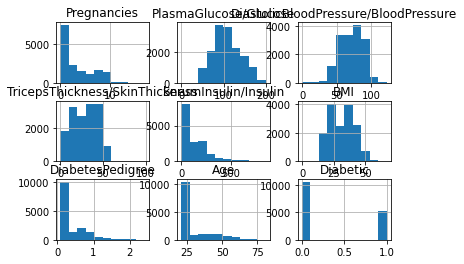

In [ ]:
df.hist()
plt.show()

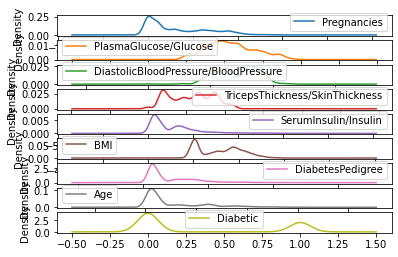

In [ ]:
df.plot(kind='density',subplots=True,sharex=False)
plt.show()

Pregnancies                                AxesSubplot(0.125,0.125;0.0731132x0.755)
PlasmaGlucose/Glucose                   AxesSubplot(0.212736,0.125;0.0731132x0.755)
DiastolicBloodPressure/BloodPressure    AxesSubplot(0.300472,0.125;0.0731132x0.755)
TricepsThickness/SkinThickness          AxesSubplot(0.388208,0.125;0.0731132x0.755)
SerumInsulin/Insulin                    AxesSubplot(0.475943,0.125;0.0731132x0.755)
BMI                                     AxesSubplot(0.563679,0.125;0.0731132x0.755)
DiabetesPedigree                        AxesSubplot(0.651415,0.125;0.0731132x0.755)
Age                                     AxesSubplot(0.739151,0.125;0.0731132x0.755)
Diabetic                                AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

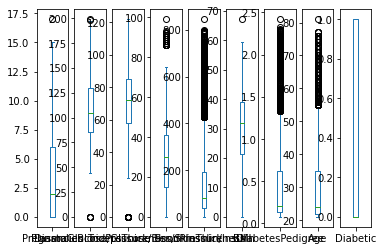

In [ ]:
df.plot(kind='box',subplots=True,sharex=False,sharey=False)

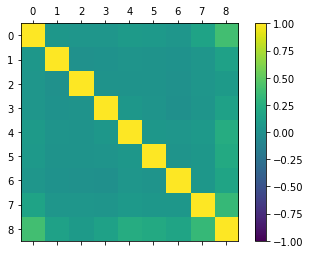

In [ ]:
 correlations=df.corr()
 fig=plt.figure()
 ax=fig.add_subplot(111)
 cax=ax.matshow(correlations,vmin=-1,vmax=1)
 fig.colorbar(cax)
 ticks=np.arange(0,9,1)
 ax.set_xticks(ticks)
 ax.set_yticks(ticks)
 plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f16bbb710>,
      dtype=object)

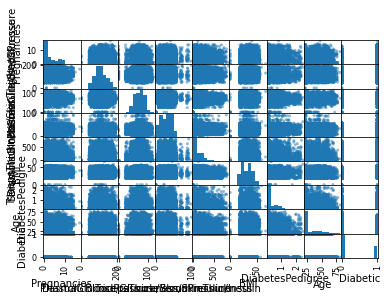

In [ ]:
 pd.plotting.scatter_matrix(df)

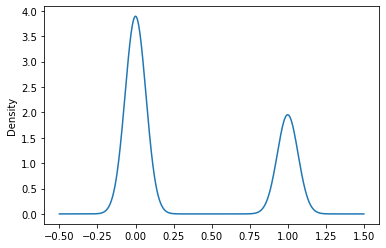

In [ ]:
df["Diabetic"].plot.kde()
plt.show()

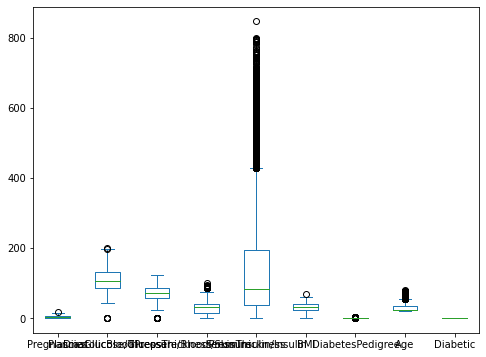

In [ ]:
df.plot.box(figsize=(8,6))
plt.show()

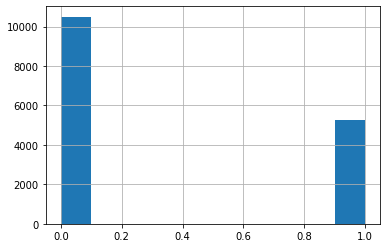

In [ ]:
df["Diabetic"].hist()
plt.show()

### Data Splitting

In [ ]:
y = df.Diabetic
x = df.drop('Diabetic', axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.head()

,Pregnancies,PlasmaGlucose/Glucose,DiastolicBloodPressure/BloodPressure,TricepsThickness/SkinThickness,SerumInsulin/Insulin,BMI,DiabetesPedigree,Age
15029,5,117,92,0,0,34.100000,0.337000,38
8657,0,89,63,44,218,40.855567,0.127805,42
2768,4,109,81,9,339,27.204728,0.214603,53
8776,14,114,76,12,55,30.665377,0.886569,22
11807,0,85,86,12,47,20.438595,0.842283,22


In [ ]:
x_train.shape

(12614, 8)

In [ ]:
x_test.head()

,Pregnancies,PlasmaGlucose/Glucose,DiastolicBloodPressure/BloodPressure,TricepsThickness/SkinThickness,SerumInsulin/Insulin,BMI,DiabetesPedigree,Age
8653,0,156,79,33,204,19.168125,0.088306,21
3495,1,59,87,31,95,30.421390,0.464941,57
1674,0,109,87,31,165,18.562167,0.143872,32
10017,0,97,63,45,50,21.339073,0.165936,24
4647,0,96,61,41,53,34.377257,0.190524,22


In [ ]:
x_test.shape

(3154, 8)

### Applying machine learning algorithms & showing their probabilities

In [ ]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train, y_train)
model1.score(x_test, y_test)

0.8795180722891566

In [ ]:
prob_decision_tree = model1.predict(x_test)
print(prob_decision_tree)

[0 0 0 ... 0 1 0]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 2, random_state = 0)
clf.fit(x_train, y_train) 
clf.score(x_test, y_test)

0.8817374762206721

In [ ]:
prob_random_forest = clf.predict_proba(x_test)
print(prob_random_forest)

[[0.82185246 0.17814754]
 [0.62081958 0.37918042]
 [0.82755731 0.17244269]
 ...
 [0.87492708 0.12507292]
 [0.32561841 0.67438159]
 [0.92925021 0.07074979]]


In [ ]:
from sklearn import svm 
clf1 = svm.SVC(probability=True)
clf1.fit(x_train, y_train)
clf1.score(x_test, y_test)

0.8072289156626506

In [ ]:
prob_svm = clf1.predict_proba(x_test)
print(prob_svm)

[[0.92768105 0.07231895]
 [0.28703522 0.71296478]
 [0.83669916 0.16330084]
 ...
 [0.95839552 0.04160448]
 [0.0351099  0.9648901 ]
 [0.95338223 0.04661777]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier 
clf2 = AdaBoostClassifier(n_estimators = 100, random_state = 0)
clf2.fit(x_train, y_train)
clf2.score(x_test, y_test)

0.937856689917565

In [ ]:
prob_adaboost = clf2.predict_proba(x_test) 
print(prob_adaboost)

[[0.51587152 0.48412848]
 [0.49911172 0.50088828]
 [0.51518196 0.48481804]
 ...
 [0.51265642 0.48734358]
 [0.489736   0.510264  ]
 [0.52737112 0.47262888]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
clf3 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 0)
clf3.fit(x_train, y_train) 
clf3.score(x_test, y_test)

0.9375396322130628

In [ ]:
prob_gradient_boost = clf3.predict_proba(x_test) 
print(prob_gradient_boost)

[[9.96799627e-01 3.20037312e-03]
 [4.66239070e-01 5.33760930e-01]
 [9.96549696e-01 3.45030380e-03]
 ...
 [9.91046953e-01 8.95304661e-03]
 [3.48342193e-02 9.65165781e-01]
 [9.99913141e-01 8.68589816e-05]]


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf4 = LinearDiscriminantAnalysis()
clf4.fit(x_train, y_train)
clf4.score(x_test, y_test)

0.7850348763474952

In [ ]:
prob_linear_discriminant_analysis = clf4.predict_proba(x_test) 
print(prob_linear_discriminant_analysis) 

[[0.93424869 0.06575131]
 [0.60456181 0.39543819]
 [0.92366657 0.07633343]
 ...
 [0.91034517 0.08965483]
 [0.03104993 0.96895007]
 [0.98505072 0.01494928]]


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf5 = QuadraticDiscriminantAnalysis()
clf5.fit(x_train, y_train)
clf5.score(x_test, y_test)

0.7859860494610019

In [ ]:
prob_quadratic_discriminant_analysis = clf5.predict_proba(x_test) 
print(prob_quadratic_discriminant_analysis)

[[0.96009317 0.03990683]
 [0.41532232 0.58467768]
 [0.97023032 0.02976968]
 ...
 [0.90629798 0.09370202]
 [0.0309317  0.9690683 ]
 [0.98709841 0.01290159]]


### Confusion matrix for all algorithms

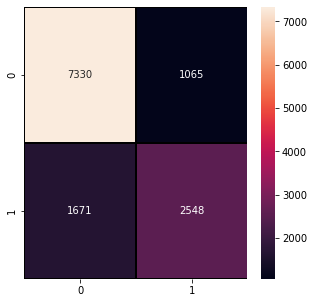

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      8395
           1       0.71      0.60      0.65      4219

    accuracy                           0.78     12614
   macro avg       0.76      0.74      0.75     12614
weighted avg       0.78      0.78      0.78     12614



In [ ]:
y_pred = clf5.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

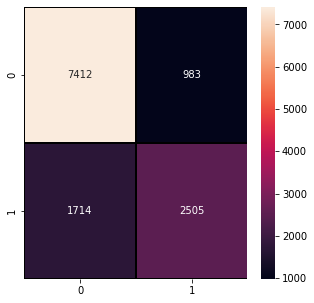

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      8395
           1       0.72      0.59      0.65      4219

    accuracy                           0.79     12614
   macro avg       0.77      0.74      0.75     12614
weighted avg       0.78      0.79      0.78     12614



In [ ]:
y_pred = clf4.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

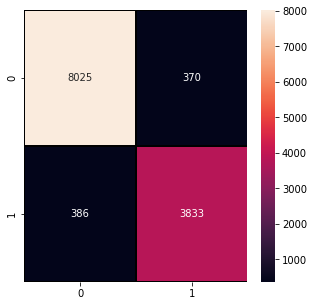

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8395
           1       0.91      0.91      0.91      4219

    accuracy                           0.94     12614
   macro avg       0.93      0.93      0.93     12614
weighted avg       0.94      0.94      0.94     12614



In [ ]:
y_pred = clf3.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

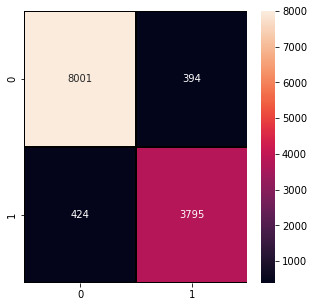

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8395
           1       0.91      0.90      0.90      4219

    accuracy                           0.94     12614
   macro avg       0.93      0.93      0.93     12614
weighted avg       0.94      0.94      0.94     12614



In [ ]:
y_pred = clf2.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

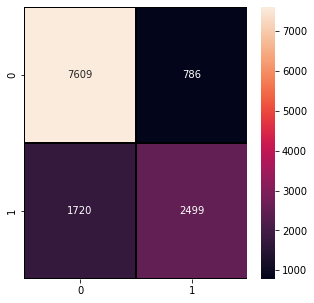

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      8395
           1       0.76      0.59      0.67      4219

    accuracy                           0.80     12614
   macro avg       0.79      0.75      0.76     12614
weighted avg       0.80      0.80      0.79     12614



In [ ]:

y_pred = clf1.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

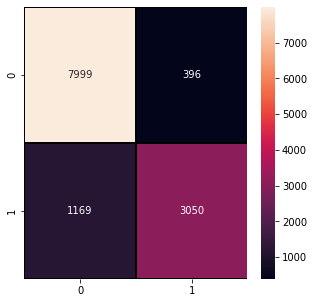

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8395
           1       0.89      0.72      0.80      4219

    accuracy                           0.88     12614
   macro avg       0.88      0.84      0.85     12614
weighted avg       0.88      0.88      0.87     12614



In [ ]:
y_pred = clf.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

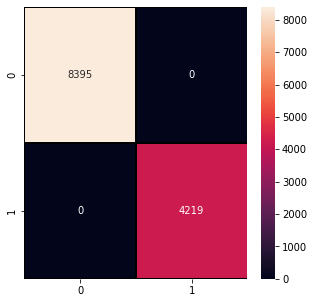

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8395
           1       1.00      1.00      1.00      4219

    accuracy                           1.00     12614
   macro avg       1.00      1.00      1.00     12614
weighted avg       1.00      1.00      1.00     12614



In [ ]:
y_pred = model1.predict(x_train)
y_true = y_train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

In [ ]:
x

,Pregnancies,PlasmaGlucose/Glucose,DiastolicBloodPressure/BloodPressure,TricepsThickness/SkinThickness,SerumInsulin/Insulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
15763,10,101,76,48,180,32.900000,0.171000,63
15764,2,122,70,27,0,36.800000,0.340000,27
15765,5,121,72,23,112,26.200000,0.245000,30
15766,1,126,60,0,0,30.100000,0.349000,47


In [ ]:
y

0        0
1        0
2        0
3        1
4        0
        ..
15763    0
15764    0
15765    0
15766    1
15767    0
Name: Diabetic, Length: 15768, dtype: int64

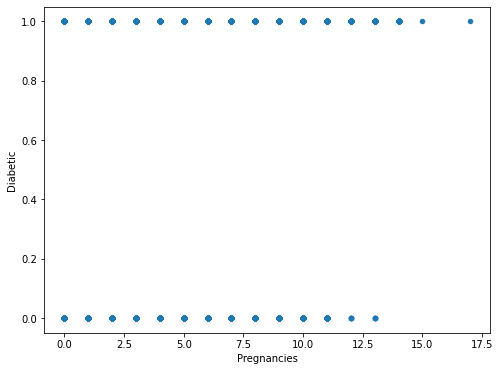

In [ ]:
df.plot.scatter(x='Pregnancies', y='Diabetic', figsize=(8,6))
plt.show()

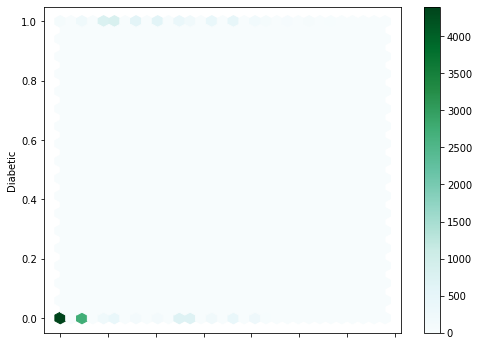

In [ ]:
df.plot.hexbin(x='Pregnancies', y='Diabetic',gridsize=30, figsize=(8,6))
plt.show()